# Association Rule Mining groceries project(Aditya Chowdhury)

Importing necessary libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
#!pip install apyori
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
grocery=pd.read_csv('Groceries_dataset.csv')
grocery

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


Checking duplicate values

In [2]:
grocery[grocery.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


Dropping duplicate values

In [3]:
grocery.drop_duplicates(inplace=True)
grocery[grocery.duplicated()]

,Member_number,Date,itemDescription


Checking for null values

In [4]:
grocery.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

Checking missing values

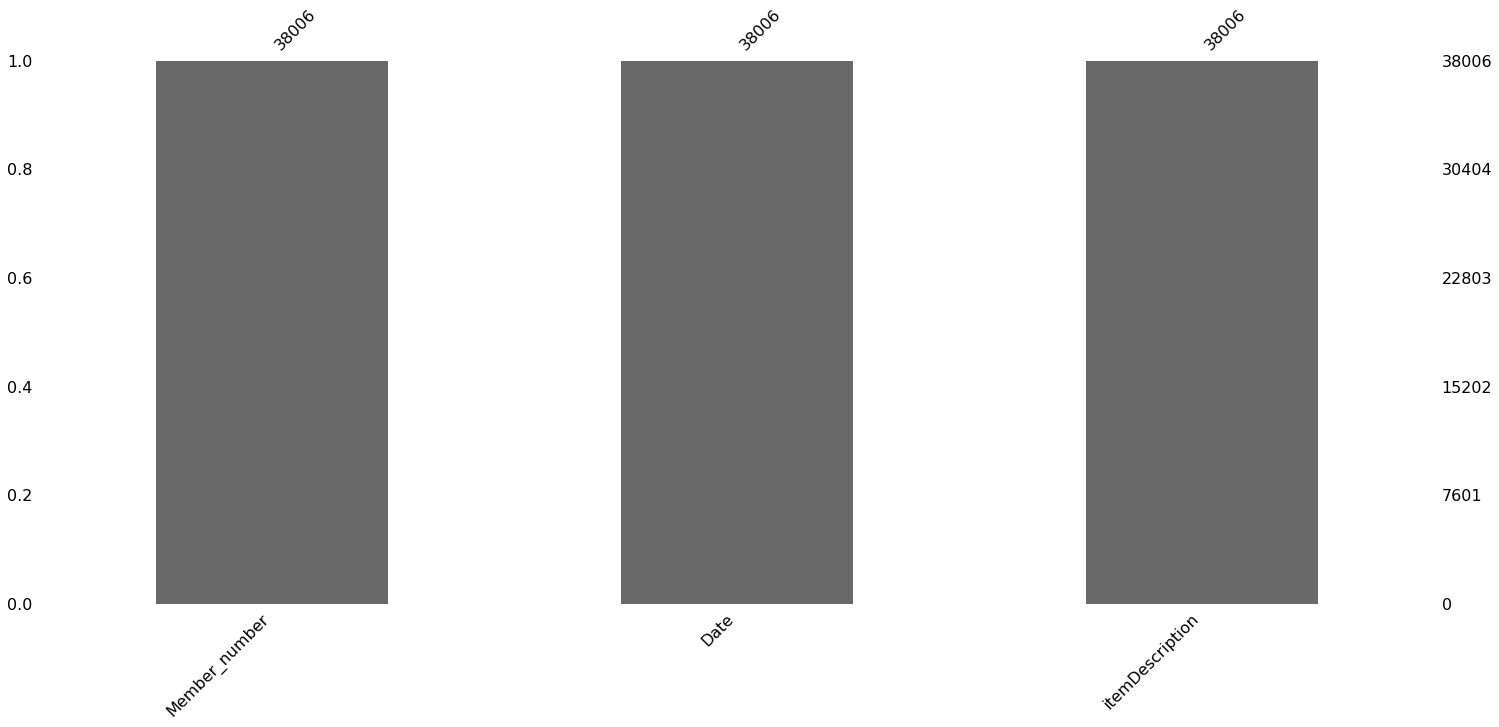

In [5]:
msno.bar(grocery)
plt.show()

Grouping items by member number and date

In [6]:
grouped_data=grocery.groupby(['Member_number','Date'])['itemDescription'].apply(list)
records=grouped_data.reset_index()
records.head()


,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


Converting dataframe to basket format

In [7]:
records.drop(['Member_number','Date'],axis=1,inplace=True)
records.head()

,itemDescription
0,"[sausage, whole milk, semi-finished bread, yog..."
1,"[whole milk, pastry, salty snack]"
2,"[canned beer, misc. beverages]"
3,"[sausage, hygiene articles]"
4,"[soda, pickled vegetables]"


Converting dataframe to list format

In [8]:
records_list=records['itemDescription'].tolist()
records_list

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk', 'pastry'],
 

Implementing apriori algorithm

In [9]:
association_rules=apriori(records_list,min_support=0.001,min_confidence=0.1,min_lift=1.1,min_length=2)
association_results=list(association_rules)

Total number of associations

In [12]:
print('Number of associations formed are:',len(association_results))

Number of associations formed are: 18


Paired items list with evaluation metrics

In [11]:
for i in association_results:
    pair=i[0]
    items=[x for x in pair]
    print('Rule:',items[0],'->',items[1])
    print('Support:',str(i[1]))
    print('confidence:',str(i[2][0][2]))
    print('Lift:',str(i[2][0][3]))
    print('------------------------------------------------------------------------')

Rule: soda -> beverages
Support: 0.001871282496825503
confidence: 0.11290322580645162
Lift: 1.1626778855760054
------------------------------------------------------------------------
Rule: yogurt -> chewing gum
Support: 0.001403461872619127
confidence: 0.11666666666666667
Lift: 1.358508430609598
------------------------------------------------------------------------
Rule: yogurt -> detergent
Support: 0.0010693042839002875
confidence: 0.12403100775193798
Lift: 1.4442614544686756
------------------------------------------------------------------------
Rule: flour -> tropical fruit
Support: 0.0010693042839002875
confidence: 0.10958904109589042
Lift: 1.6171408500175626
------------------------------------------------------------------------
Rule: other vegetables -> frankfurter
Support: 0.005146026866270133
confidence: 0.13628318584070798
Lift: 1.1161495948191098
------------------------------------------------------------------------
Rule: herbs -> yogurt
Support: 0.0011361358016440553
